<a href="https://colab.research.google.com/github/SarathiPrabu/BankingSolution/blob/master/a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/SarathiPrabu/CS670-Assignment1/blob/main/a2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Assignment 2


# Gaussian Maximum Likelihood

##  MLE of a  Gaussian $p_{model}(x|w)$

You are given an array of data points called `data`. Your course site plots the negative log-likelihood  function for several candidate hypotheses. Estimate the parameters of the Gaussian $p_{model}$ by  coding an implementation that estimates its optimal parameters (15 points) and explaining what it does (10 points). You are free to use any Gradient-based optimization method you like.  

In [ ]:
import numpy as np

data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]


def gradient(params, data):
    mu, sigma = params
    n = len(data)
    # Derivative of mean and standard deviation to find the slope of liklihood
    d_mu = np.sum((data-mu)/(sigma**2))
    d_sigma = np.sum((data-mu)**2/(sigma**3*np.sqrt(2*np.pi)))
    return np.array([-d_mu, -d_sigma])


def sgd(data, learning_rate=0.01, epochs=100000, tol=1e-5):

    # Choose a random position to calculate the first mean and standard deviation
    mu, sigma = np.mean(data[1:3]), np.std(data[1:3])
    params = np.array([mu, sigma])
    print(params)
    f_params = params.copy()

    for epoch in range(epochs):
        prev_params = params.copy()
        grad = gradient(params, data)
        params -= learning_rate * grad
        #print(f"epoch: {epoch} parameters = {params[0]} and {params[1]} gradient: {grad}")
        # if the gradient is 0 then the likelihhod is maximum
        # slope is zero at the maximum
        fepoch = epoch
        if np.linalg.norm(params - prev_params) < tol:
            break
    f_params[0] = params[0]

    f_params[1] = params[1]
    print(f"epoch : {fepoch}" )
    return f_params

params = sgd(data)
print(f"Optimal parameters: mu={params[0]:.2f}, sigma={params[1]:.2f}")
print(f"Actual mu:{np.mean(data)} sigma: {np.std(data)}")

[6. 1.]
epoch : 99999
Optimal parameters: mu=6.21, sigma=19.04
ACTUAL mu:6.214285714285714 sigma: 2.425418120907092


The code find the parameters (mean and variance) using gradient descent function where the derivative of mean and variance is calculated. Then the new parameter value is adjusted based on the gradient value and the learning rate(hyperparameter - in this program it is 0.01).

If the gradient is zero then we have found the maximum likelihood. However the exact zero can't be reached as it converges. So if the change in gradient is the tolerance(tol=1e-5) value which is very small then the pamaters with maximum likelihood is found and so it breaks.

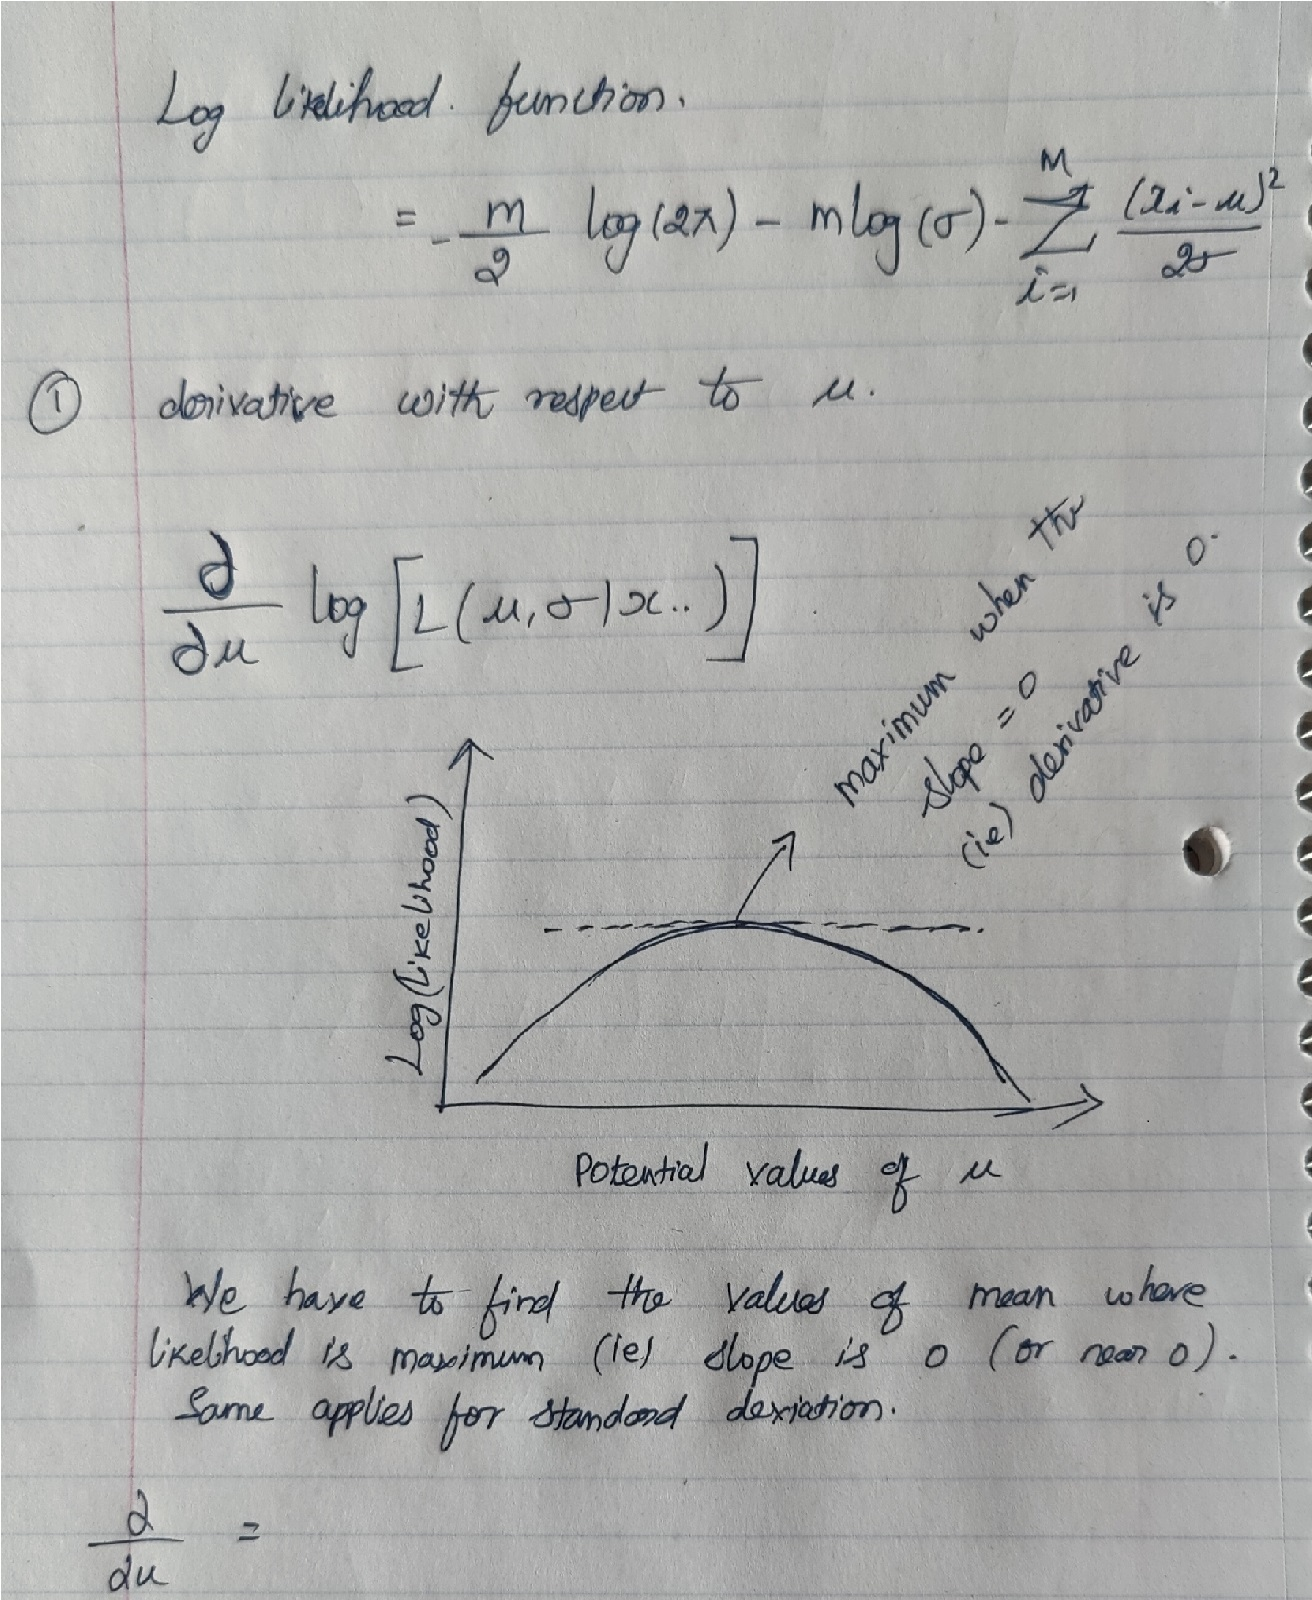

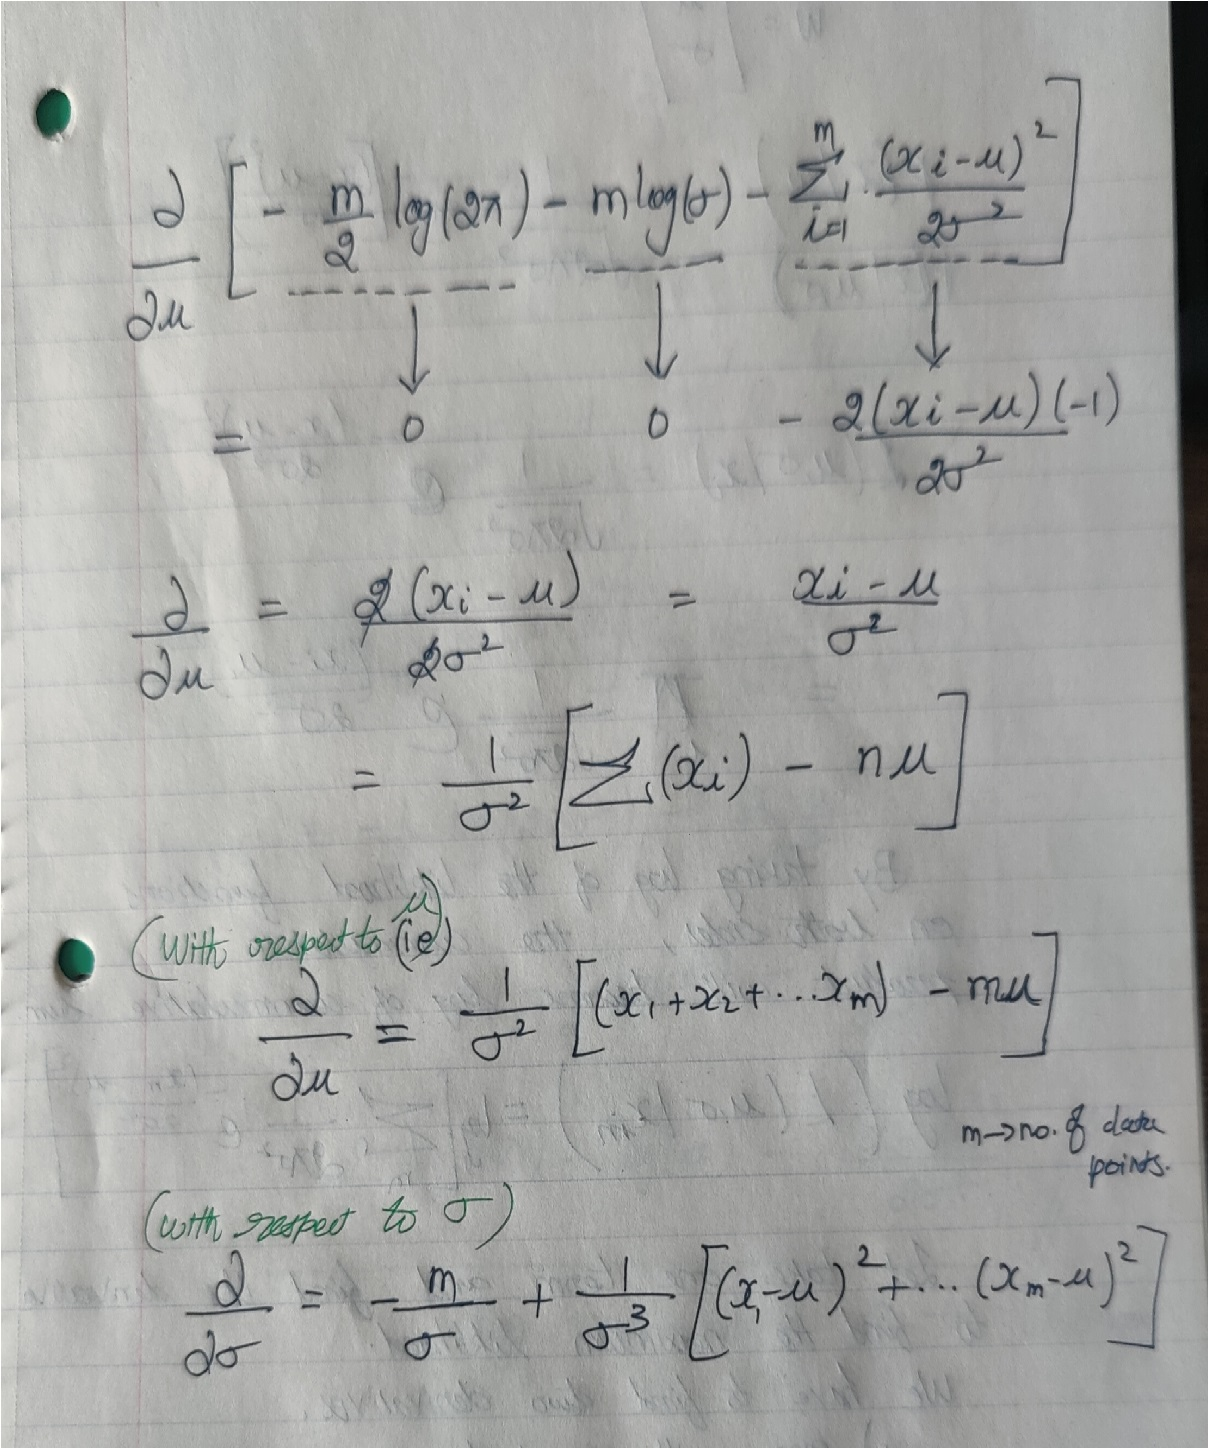

## MLE of a conditional Gaussian $p_{model}(y|x,w)$

You are given a problem that involves the relationship between $x$ and $y$. Estimate the parameters of a $p_{model}$ that fit the dataset (x,y) shown below.   You are free to use any Gradient-based optimization method you like.  


In [6]:
x = np.array([8, 16, 22, 33, 50, 51])
y = np.array([5, 20, 14, 32, 42, 58])

# add your code here

def neg_log_likelihood(w, x, y):
    n = len(x)
    variance = np.var(y - w * x)
    return 0.5 * n * np.log(2 * np.pi) + 0.5 * n * np.log(variance) + 0.5 * np.sum((y - w * x)**2 / variance)

def gradient(w, x, y):
    n = len(x)
    variance = np.var(y - w * x)
    return -np.sum((y - w * x) * x / variance) / n

def optimize(x, y, learning_rate=0.01, num_iterations=1000):
    w = 0  # Initial value of w
    for _ in range(num_iterations):
        grad = gradient(w, x, y)
        w -= learning_rate * grad
    return w

estimated_w = optimize(x, y)
nll = neg_log_likelihood(estimated_w, x, y)

print("Estimated value of w:", estimated_w)
print("Negative log-likelihood:", nll)


Estimated value of w: 0.9696883042607949
Negative log-likelihood: 18.981640957360938
